In [994]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

In [995]:
year = "2018-2023"

In [996]:
def process_year(string):
    try:
        int(string)
        return int(string), int(string)
    except:
        pass
    if "-" not in string:
        return "ERROR"
    else:
        lower, upper = string.split("-")
        return int(lower), int(upper)

In [997]:
lower, upper = process_year(year)

In [998]:
year_list = list(range(lower, upper+1))

In [999]:
zip_data = pd.read_csv("C4K.csv")
zip_data.drop("Unnamed: 0", axis = 1, inplace = True)
old_data = zip_data[zip_data["DATE"].isin(year_list)]

In [1000]:
old_data.drop("DATE", axis = 1, inplace = True)
old_data["ZIP CODE"] = old_data["ZIP CODE"].astype(int).astype(str)

In [1001]:
old_data

,ZIP CODE,Given
0,70311,12.0
1,73002,5.0
2,73003,4.0
3,73005,85.0
4,73008,271.0
...,...,...
859,74953,200.0
860,74955,200.0
861,74960,250.0
862,78120,8.0


In [1002]:
zip_shapes = gpd.read_file("zipShapes/oklahoma-zip-code-boundaries.shp")

In [1003]:
non_code = (zip_shapes["zcta5ce00"][~zip_shapes["zcta5ce00"].isin(old_data["ZIP CODE"])]).values

In [1004]:
non_code

array(['74761', '74738', '74764', '74766', '73548', '73543', '73531',
       '73041', '74062', '73549', '74075', '73063', '740HH', '73651',
       '73559', '73566', '73655', '736HH', '74837', '73056', '73073',
       '74637', '73526', '73560', '73539', '73022', '74054', '74001',
       '74103', '74146', '74120', '74754', '74755', '74963', '74737',
       '73838', '74435', '74962', '74948', '74936', '74827', '74839',
       '73747', '73561', '73442', '74015', '74080', '74053', '74055',
       '74442', '74132', '73449', '734HH', '74731', '74733', '74730',
       '74741', '74721', '74720', '73571', '73537', '74445', '74447',
       '73455', '73447', '73450', '74836', '74856', '74434', '74403',
       '74570', '74850', '74650', '74032', '74081', '74020', '746HH',
       '74651', '73746', '73852', '73520', '73569', '73944', '74335',
       '73939', '73717', '73716', '73860', '73726', '73729', '74536',
       '74571', '74463', '74450', '73488', '73481', '73444', '73437',
       '73487', '734

In [1005]:
filled_df = pd.DataFrame(list(zip(non_code,np.zeros(len(non_code)))),columns = ["ZIP CODE", "Given"])

In [1006]:
filled_df

,ZIP CODE,Given
0,74761,0.0
1,74738,0.0
2,74764,0.0
3,74766,0.0
4,73548,0.0
...,...,...
395,74842,0.0
396,73661,0.0
397,73664,0.0
398,73841,0.0


In [1007]:
final_df = pd.concat([old_data, filled_df], axis = 0)

In [1008]:
final_df

,ZIP CODE,Given
0,70311,12.0
1,73002,5.0
2,73003,4.0
3,73005,85.0
4,73008,271.0
...,...,...
395,74842,0.0
396,73661,0.0
397,73664,0.0
398,73841,0.0


In [1009]:
def given_map2(number):
    if number == 0:
        return "0"
    elif number < 10:
        return "1"
    elif number < 50:
        return "2"
    elif number < 200:
        return "3"
    elif number < 1000:
        return "4"
    return "5"

In [1010]:
final_df = final_df.groupby(["ZIP CODE"])["Given"].apply(np.sum, axis = 0).reset_index()

In [1011]:
final_df

,ZIP CODE,Given
0,59601,4.0
1,67869,0.0
2,67950,0.0
3,70311,12.0
4,71159,9.0
...,...,...
734,773179,2.0
735,78120,8.0
736,79005,0.0
737,79051,0.0


In [1012]:
final_df["Adjusted"] = final_df["Given"].map(given_map2)

In [1014]:
final_df

,ZIP CODE,Given,Adjusted
0,59601,4.0,1
1,67869,0.0,0
2,67950,0.0,0
3,70311,12.0,2
4,71159,9.0,1
...,...,...,...
734,773179,2.0,1
735,78120,8.0,1
736,79005,0.0,0
737,79051,0.0,0


In [1016]:
df = pd.merge(zip_shapes, final_df, right_on="ZIP CODE", left_on="zcta5ce00", how = "left")

In [1017]:
df

,zcta5ce00,classfp00,mtfcc00,funcstat00,geometry,ZIP CODE,Given,Adjusted
0,73072,B5,G6350,S,"MULTIPOLYGON (((-97.51054 35.20175, -97.5104 3...",73072,135.0,3
1,74761,B5,G6350,S,"POLYGON ((-95.19136 34.04094, -95.19136 34.040...",74761,0.0,0
2,74523,B5,G6350,S,"MULTIPOLYGON (((-95.44022 34.15921, -95.44014 ...",74523,658.0,4
3,74738,B5,G6350,S,"MULTIPOLYGON (((-95.42778 33.87064, -95.42724 ...",74738,0.0,0
4,74764,B5,G6350,S,"MULTIPOLYGON (((-95.03902 33.86874, -95.03909 ...",74764,0.0,0
...,...,...,...,...,...,...,...,...
677,73664,B5,G6350,S,"POLYGON ((-99.13506 35.21884, -99.13432 35.218...",73664,0.0,0
678,73841,B5,G6350,S,"MULTIPOLYGON (((-99.54157 36.58613, -99.54231 ...",73841,0.0,0
679,73551,B5,G6350,S,"POLYGON ((-98.80167 34.34819, -98.80163 34.341...",73551,0.0,0
680,74354,B5,G6350,S,"MULTIPOLYGON (((-94.8533 36.94368, -94.8494 36...",74354,5.0,1


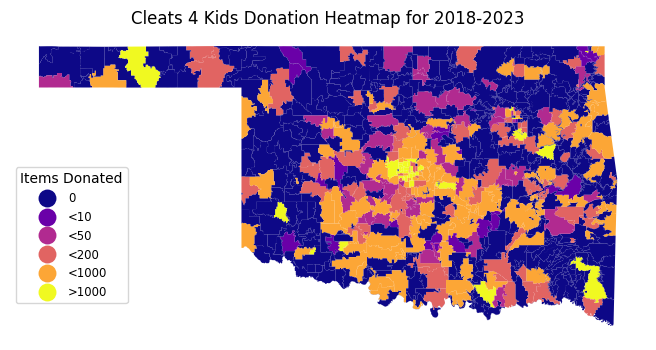

In [1018]:
fig, ax = plt.subplots(figsize=(9,4))
df.plot(legend = True, column = "Adjusted", legend_kwds={'loc':'lower left', 
                        'bbox_to_anchor':(0, 0.1), 
                        'markerscale':1.29, 
                        'title_fontsize':'medium', 
                        'fontsize':'small'},cmap = "plasma", ax = ax)

leg1 = ax.get_legend()
leg1.set_title("Items Donated")
new_legtxt = ["0","<10","<50","<200", "<1000", ">1000"]
for i,eb in enumerate(leg1.get_texts()):
    eb.set_text(new_legtxt[i])

plt.gca().axis('off')
plt.title(f"Cleats 4 Kids Donation Heatmap for {year}")
plt.savefig("Plot.png")